In [1]:
import networkx as nx
import numpy as np
import igraph
import matplotlib.pyplot as plt

In [12]:
def read_communities(comm_path):
    communities = {}
    assigned_nodes = set()
    lines = open(comm_path,"r").readlines()
    for l in lines:
        parts = l.strip().split("\t")
        node_id = int(parts[0])
        assigned_nodes.add(node_id)
        for x in parts[1].split(" "):
            comm_id = int(x)
            if not comm_id in communities:
                communities[comm_id] = set()
            communities[comm_id].add( node_id )
    return communities

In [2]:
G = nx.read_edgelist('6-email-eu-core/email-eu-core.edges')

In [3]:
node_degrees = np.array(list(dict(G.degree()).values()))

Text(0.5,1,'Node Degrees of Real Email Dataset')

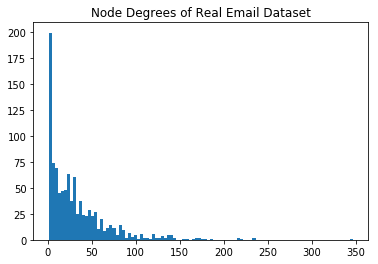

In [4]:
plt.hist(node_degrees, bins=100)
plt.title('Node Degrees of Real Email Dataset')

In [9]:
node_degree_power_law = igraph.power_law_fit(node_degrees)

In [23]:
comms = read_communities('6-email-eu-core/email-eu-core.comm')
comm_sizes = []
for comm, elems in comms.items():
    comm_sizes.append(len(elems))
comm_size_power_law = igraph.power_law_fit(comm_sizes)

In [24]:
print 'Highest node degrees of real email dataset: ' + str(np.sort(node_degrees)[-10:])
print 'Max degree on fake dataset: 50'
print '{0:.2f}% of real nodes have degree higher than 50'.format(np.count_nonzero(node_degrees > 50)*100/len(node_degrees))
print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
print 'Mean node degree of real email dataset: ' + str(np.mean(node_degrees))
print 'Mean degree on fake dataset: 20'
print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
print 'Power law exponent of degree distribution on real email dataset: {0:.2f}'.format(node_degree_power_law.alpha)
print 'Power law exponent of degree distribution on fake dataset: 3'
print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
print 'Power law exponent of community size distribution on real email dataset: {0:.2f}'.format(comm_size_power_law.alpha)
print 'Power law exponent of community size distribution on fake dataset: 2'

Highest node degrees of real email dataset: [173 177 180 185 216 218 221 233 234 347]
Max degree on fake dataset: 50
21.00% of real nodes have degree higher than 50
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean node degree of real email dataset: 33.245771144278606
Mean degree on fake dataset: 20
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Power law exponent of degree distribution on real email dataset: 5.47
Power law exponent of degree distribution on fake dataset: 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Power law exponent of community size distribution on real email dataset: 2.55
Power law exponent of community size distribution on fake dataset: 2
